---


**$$\color{orange}{AML\ 5151\,\lvert\, Applied\ Linear\ Algebra\,\lvert\,Lab\ Final\,\lvert\,Odd\ Semester\ 2023}$$**

---

**Instructions:**
1. There are 2 problems with sub-parts to each problem;
2. You are welcome to refer to any non-human resource for answering the questions but you must *not* discuss your questions or code with anyone else, inside or outside the class;
3. By submitting your work, you are implicitly honoring the agreement above;
4. You might be called for a one-on-one during the final exam after reviewing your submission to explain your code and answer additional questions. Failure to justify your code and answers will result in significant points docked from your final exam score.

---

**Upload the following two files by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/Es9TcouX6qtNkvljyGPBukABcPKB_7OdeczAVPqystz1eg)**

1. Completed code clearly showing the output cells (.ipynb file) **with the naming convention example** $$\color{cyan}{\text{ALA_LabFinal_SudarsanAcharya.ipynb}}$$ and
2. PDF of your completed code clearly showing the output cells (go to file->print->save as PDF choosing Landscape orientation) **with the naming convention example** $$\color{cyan}{\text{ALA_LabFinal_SudarsanAcharya.pdf}}$$


---

In [1]:
## Load Libraries
import numpy as np
import sympy as sp
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import random
from scipy import stats

In [2]:
# plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')
%matplotlib inline

---

**Note**: the following function produces a component plot of a vector. Just run the cell.

---


In [3]:
def plotveccomp(x, name = ' ', color = 'black', marker = '*', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Index')
  ax.set_ylabel('Value')
  ax.set_title('Component plot of '+name)

---

**Note**: the following function generates a random $n\times n$-matrix for a given input $n.$ The entries of the matrix are *normally* distrbuted with mean 0 and standard deviation 1. Just run the cell.

---

In [4]:
def genrandMatrix(n):
  A = np.random.normal(0, 1, (n, n))
  return(A)

---

**Question-1.1**: Generate a $8\times 8$-random matrix and flatten it into a 1D-vector $a$.

---

In [5]:
n = 8
a = genrandMatrix(n).flatten()
print(a62.5.shape)

(64,)


---

**Question-1.2**: Make a component plot of the vector $a$.

---

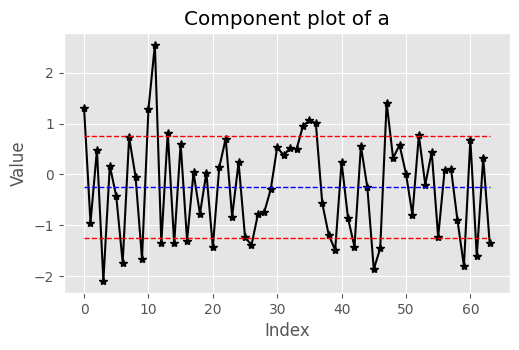

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
fig.tight_layout(pad=4.0)
plotveccomp(a, 'a', 'black', '*', ax)


---

**Question-1.3**: What percentage of components of $a$ are within 1 standard deviation from the mean? Is the result a familiar number?

---

In [7]:
(np.mean(abs(a - np.mean(a)) <= np.std(a)))*100

62.5

---

**Note**: The following function generates a so called *Hadamard matrix* $H.$ Run the cell, and observe the columns of the matrix.

---

In [56]:
from scipy.linalg import hadamard
H = hadamard(4)
print(H)
H-H.T

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

---

**Question-1.4**: Check if the columns of the Hadamard matrix generated above are linearly independent.

---

In [9]:
AugmentedMatrix = sp.Matrix(H)
print(AugmentedMatrix.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]]), (0, 1, 2, 3))


---

**Question-1.5**: Generate a Hadamard matrix with number of rows and columns equal to the size of vector $a$.

---

In [10]:
H = hadamard(len(a))
H.shape

(64, 64)

---

**Question-1.6**: Check if the columns of $H$ are mutually orthogonal.

---

In [64]:
# np.dot(H[:, 0], H[:, 1])
print((np.dot(H.T, H) == np.eye(H.shape[1])).all())
np.dot(H.T, H)

False


array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 4]])

---

**Question-1.7**: Normalize the columns of $H.$ That is, divide each column of $H$ by the $l_2$-norm of that column.

---

In [12]:
H_normalized = H / np.linalg.norm(H, axis=0)

---

**Question-1.8**: Print the $l_2$ norms of the columns of the normalized version of $H.$ What do you observe?

---

In [13]:
np.linalg.norm(H_normalized, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

---

**Question-1.9**: Calculate the scalar projections (shadow lengths) of vector $a$ projected on to the columns of the normalized version of $H$ and store them in a vector $u.$

---

In [14]:
u = np.dot(H_normalized.T, a)

---

**Question-1.10**: Make a component plot of $a$ and $u$ in two figures. Use different colors for the vectors.

---

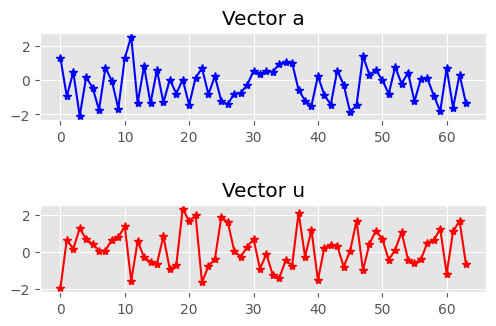

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,4))
fig.tight_layout(pad = 4.0)

ax1.plot(a, color='blue', marker='*')
ax1.set_title('Vector a')

ax2.plot(u, color='red', marker='*')
ax2.set_title('Vector u')

plt.show()

---

**Question-1.11**: What percentage of components of $u$ are within 1 standard deviation from the mean? What do you observe from the result?

---

In [55]:
percentage = ((np.sum((u >= np.mean(u) - np.std(u)) & (u <= np.mean(u) + np.std(u))) / len(u)) * 100)
print(np.mean(abs(u - np.mean(u)) <= 1*np.std(u))*100)
print(percentage)

# data in u is approximately normally distributed.

67.1875
67.1875


---

**Question-2**: Consider the following model for opinion formation among $n$ individuals, each of whom interact with a certain number of individuals in the group. The numerical value of the $i$th person's opinion is denoted as $x_i.$ The value of $x_i$ is influenced by the following:
* The $i$th person's self opinion denoted as
$s_i$
* The opinions of the remaining individuals $x_j,$ where $j=1,2,\ldots,n$ and $j\neq i.$  

Assuming that the $i$th person gives a weightage $w_{ij}$ to the $j$th person's opinion, we can compute $x_i$ as follows:
$$x_i = \dfrac{s_i+\sum_{j\neq i}w_{ij}x_j}{1+\sum_{j\neq i}w_{ij}},\quad i=1,\ldots,n.$$
It is clear that the weightage that a person gives to his own opinion is taken to be $1$ as seen in the denominator of the equation above.

The equation above can be written as $(A+I)x=s,$ where $A$ is an $n\times n$-matrix and $I$ represents the identity matrix.

The code snippet below simulates the $n\times n$-matrix $W$ representing the weights and the $n$-vector $s$ representing the self opinions for some topic of interest. Just run the cell. Note that $W$ is a *sparse matrix* with most of its entries equal to zero; that is, each individual interacts only with a few others.

---

In [32]:
# Simulating a social network weight matrix and self-opinion vector
np.random.seed(1)
rs = 2023
n = 100
rvs = stats.norm(0, 0.3).rvs
W = random(n, n, density = 0.2, random_state = rs, data_rvs = rvs).A
# Each individual gives the highest weight (= 1) to her-/himself
np.fill_diagonal(W, 1)
W = np.where(W > 1, 1, W)
W = np.where(W < -1, -1, W)
s = stats.norm(0, 4).rvs(size = n)
s = MinMaxScaler((-10, 10)).fit_transform(s.reshape(-1, 1)).flatten()

---

**Question-2.1**: The self opinion values range from -10 to 10 indicating a very negative and a very positive opinion, respectively, about the topic of interest. Does the average self opinion value indicate a positive, negative, or neutral opinion about the topic?

---

In [39]:
average_opinion = np.mean(s)
opinion_category = "positive" if average_opinion > 0 else "negative" if average_opinion < 0 else "neutral"
print("The avaerage opinion category is " + opinion_category + ".")


The avaerage opinion category is negative.


In [40]:
average_opinion = np.mean(s)
average_opinion

-0.13326690030950242

---

**Question-2.2**: Make a component plot of the self opinion vector $s$.

---

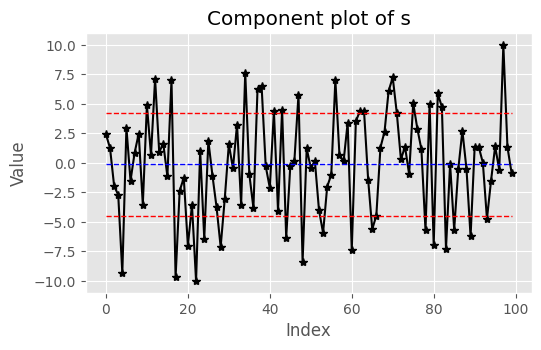

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
fig.tight_layout(pad=4.0)
plotveccomp(s, 's', 'black', '*', ax)

---

**Question-2.3**: Suppose we consider self opinion values beyond 2 standard deviations from the mean as being extreme. What percentage of individuals have extreme opinions about the topic of interest?

---

In [42]:
percentage = ((np.sum((s < np.mean(s) - 2*np.std(s)) | (s > np.mean(s) + 2*np.std(s))) / len(s)) * 100)
print(f"The percentage of individuals with extreme opinions is {percentage}%")

The percentage of individuals with extreme opinions is 4.0%


---

**Question-2.4**: Construct the matrix $A$ and the identity matrix $I$ in the code snippet below.

---

In [43]:
A = np.zeros((n, n))
for i in np.arange(n):
  A[i, i] = np.sum(W[i, :]) - W[i,i]
  for j in np.arange(n):
    if j != i:
      A[i, j] = -W[i, j]
I = np.identity(n)
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

---

**Question-2.5**: Solve the system of equations $(A+I)x = s.$

---

In [44]:
solution = linalg.lstsq(A+I, s)
x = solution[0]
print(x)

[ -43.85844119    0.93164211   46.47654231   16.2816332  -553.66806791
  102.10672878   19.19905748   -6.3890601   -14.06229233    7.10824732
   18.85884661  -18.37370543 -123.08888792   63.4712728  -146.29158284
   16.46106755    3.78315361  -56.62650194 -114.89904653 -157.31458194
 -108.02299605  -47.7047659     4.40538606   -6.17791935   57.5358923
 -283.75621915   69.58848663  514.54977366  -50.28468697  -40.25680486
   13.31615196 -186.56183817    2.49324861  -26.65083207  -99.15769277
   38.6539714    12.40730179  -24.40793966  -39.38949101  -21.7970719
    3.34991546 -149.70087034  126.14394898   -2.21510403  103.03094805
  169.69420947   35.15296941  -58.87955722   28.5846674   -49.13461717
  -75.09108155   64.48738686 -251.81315318  -43.19264474  -38.47510753
   -3.49656981   29.49967785   99.89111109  -80.38558634   69.65788223
   62.48537376   62.74846991   54.69032809  144.30948784   24.44972213
 -117.3365357   -87.98595794  112.96981776   -9.15446243 -131.29354244
  500.85

---

**Question-2.6**: Does the average of the opinion values calculated above indicates a positive, negative, or neutral opinion about the topic?

---

In [52]:
average_opinion = np.mean(x)

average_opinion = "positive" if average_opinion > 0 else "negative" if average_opinion < 0 else "neutral"
print("The avaerage opinion category is " + average_opinion + ".")


The avaerage opinion category is negative.


In [53]:
average_opinion = np.mean(x)
average_opinion

-1.9666086135775658

---

**Question-2.7**: Using the opinion values computed above, calculate the percentage of individuals have extreme opinions about the topic of interest?

---

In [47]:
percentage_extreme_opinions = ((np.sum((x < np.mean(x) - 2*np.std(x)) | (x > np.mean(x) + 2*np.std(x))) / len(x)) * 100)
print(f"The percentage of individuals with extreme opinions is {percentage_extreme_opinions}%")

The percentage of individuals with extreme opinions is 5.0%
